This is an example of using CNN on MNIST Dataset in the simplest way possible by me.

Hope everyone watching this likes it.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Import the important libraries

In [34]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

Import the data in the train and test from the input directory

In [2]:
# Input data files are available in the "../input/" directory.
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

check the shape of the train and test data

In [4]:
train.shape, test.shape

((42000, 785), (28000, 784))

Splitting the data into X and y(i.e independent and dependent varaible in simple terms)

In [31]:
X = train.drop(labels=["label"], axis=1)
y = train["label"]

# check the shape
X.shape, y.shape

((42000, 784), (42000,))

Now let us check whether the target variable is imbalanced or not in the training data

In [32]:
# checking manually
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

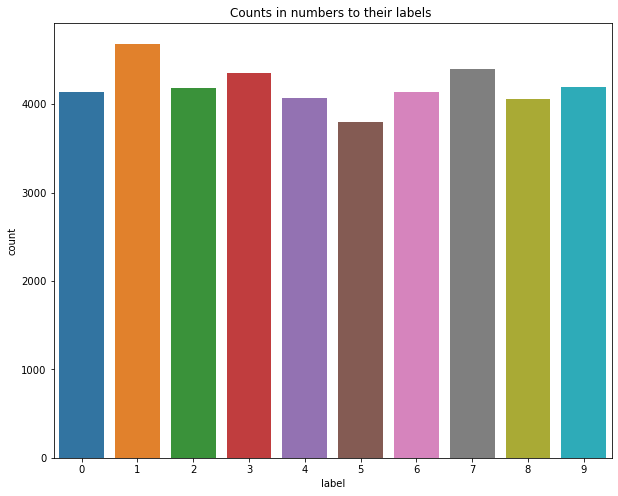

In [33]:
# Checking by plotting the same
plt.subplots(figsize = (10,8))
plt.title('Counts in numbers to their labels ')
sns.countplot(x=y, data=train)
plt.show()

We can easily conclude from the above that the data is not unbalanced

Now we will split the data into training and testing

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.1 , random_state = 99)
# check the shape now
X_train.shape,X_test.shape,y_train.shape,y_test.shape,test.shape

((37800, 784), (4200, 784), (37800,), (4200,), (28000, 784))

In [45]:
X_train=X_train.values.astype('float32')
X_test=X_test.values.astype('float32')
test=test.values.astype('float32')

Here above we converted the values of the data into float32, by which the above three dataframes got converted into a numpy array

In [46]:
# changing the shape of X_train and y_train and test also
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)
test=test.reshape(test.shape[0] , 28 , 28 , 1)

Now check the shape again

In [47]:
X_train.shape,X_test.shape,test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (28000, 28, 28, 1))

Now we will check the range values of the data.

In [52]:
# check the maximum values in the dataset
X_train.max(),X_train.min()

(255.0, 0.0)

We can easily that the data range is between 0 to 255, here we need to normalize the data to bring it into the range of 0 to 1 so that our model predicts the data more efficiently

In [53]:
X_train=X_train/255
X_test=X_test/255
test=test/255

In [54]:
# check the maximum values in the dataset
X_train.max(),X_train.min()

(1.0, 0.0)

Now our data has been normalized, we can also scale the data by using MinMaxScaler as well as Standard Scaler

**Now we will Build the Model**

Before building the model here we will need to pass the input shape

In [55]:
input_shape=X_train[0].shape
input_shape

(28, 28, 1)

In [56]:
# import model
model=Sequential()
# layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# simple ANN now

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(10, activation='softmax'))

Now we will check the summary to see how many parameters are we passing in this model

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Now we will compile the model,by using the optimizer as adam and loss as 'binary_categorical_crossentropy' and metris as ['accuracy']

In [58]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fitting the model

In [59]:
%%time
history=model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test,y_test))

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 53s 1ms/sample - loss: 0.2939 - accuracy: 0.9108 - val_loss: 0.0789 - val_accuracy: 0.9762
Epoch 2/10
37800/37800 [==============================] - 52s 1ms/sample - loss: 0.0977 - accuracy: 0.9702 - val_loss: 0.0614 - val_accuracy: 0.9833
Epoch 3/10
37800/37800 [==============================] - 51s 1ms/sample - loss: 0.0705 - accuracy: 0.9779 - val_loss: 0.0566 - val_accuracy: 0.9843
Epoch 4/10
37800/37800 [==============================] - 51s 1ms/sample - loss: 0.0584 - accuracy: 0.9818 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 5/10
37800/37800 [==============================] - 51s 1ms/sample - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0436 - val_accuracy: 0.9890
Epoch 6/10
37800/37800 [==============================] - 52s 1ms/sample - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.0424 - val_accuracy: 0.9879
Epoch 7/10
37800/37800 [==============================] -

Evaluate the model

In [60]:
# evaluating the model with testing data
loss, accuracy=model.evaluate(X_test,y_test)
loss, accuracy

4200/4200 [==============================] - 1s 352us/sample - loss: 0.0508 - accuracy: 0.9888


(0.05082371198764165, 0.9888095)

We will plot the data

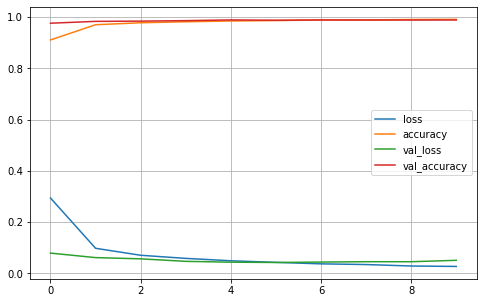

In [61]:
# plot the figure now
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

Making the prediction using the model

In [66]:
# plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [67]:
y_pred = model.predict_classes(X_test)

In [ ]:
class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
class_names

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd5320d4e10>)

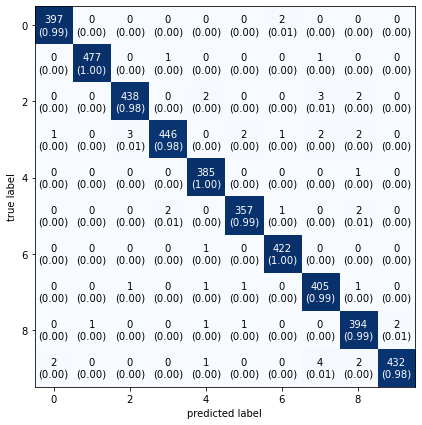

In [69]:
mat=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names= class_names,show_normed=True, figsize=(7,7))